# Natural Language Processing - Sentiment Analysis
Authors: [RedSkittleFox](https://github.com/RedSkittleFox), [DJAltair](https://github.com/DJAltair)

# Load The Data

In [1]:
from urllib.request import urlretrieve
import zipfile


amazon_mobile_reviews_url =  "https://eduds.blob.core.windows.net/nlp/Amazon_Unlocked_Mobile.csv.zip"
filename = "Amazon_Unlocked_Mobile.csv.zip"

urlretrieve(amazon_mobile_reviews_url, filename)

with zipfile.ZipFile("/content/Amazon_Unlocked_Mobile.csv.zip") as zfile:
  zfile.extractall()


In [2]:
import pandas as pd
df = pd.read_csv("/content/Amazon_Unlocked_Mobile.csv")


In [3]:
df = df[:5000]
df

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
4995,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,5,This review is not for the product as you may ...,64.0
4996,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,4,The product was in good structure. I'm still n...,0.0
4997,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,1,The iPhone was fine. It works and is in good c...,157.0
4998,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,2,Screen cracked really quick.,0.0


# Perform sentiment analysis with  nltk SentimentIntensityAnalyzer

Use library:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

Evaluate results:
1. accuracy
2. misclasification matrix

In [4]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [5]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [6]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

df['Sentiment'] = np.where(df['Rating'] >= 3, 1, 0)

df['Predicted_Sentiment'] = df['Reviews'].apply(lambda review: 1 if sid.polarity_scores(str(review))['compound'] >= 0 else 0)

accuracy = accuracy_score(df['Sentiment'], df['Predicted_Sentiment'])
print(f"Accuracy: {accuracy}")

cm = confusion_matrix(df['Sentiment'], df['Predicted_Sentiment'])
print(f"Confusion Matrix:\n{cm}")

true_negative = cm[0,0]
false_positive = cm[0,1]
false_negative = cm[1,0]
true_positive = cm[1,1]

print(f"True Negatives: {true_negative}")
print(f"False Positives: {false_positive}")
print(f"False Negatives: {false_negative}")
print(f"True Positives: {true_positive}")

Accuracy: 0.8272
Confusion Matrix:
[[ 715  621]
 [ 243 3421]]
True Negatives: 715
False Positives: 621
False Negatives: 243
True Positives: 3421


# EDA and Data Preprocessing

1. Replace   null values in Brand Name with "Unknown" value
2. Find distribution of Rating (plot histogram)
3. Recode Rating  value into Sentiment (Rating >=3 - positive sentiment (1) , Rating  < 3 - negative (0))

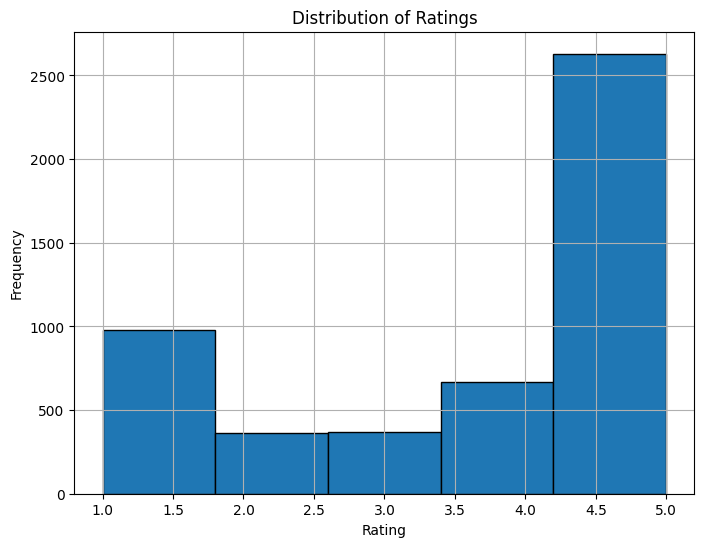

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df['Brand Name'] = df['Brand Name'].fillna("Unknown")

plt.figure(figsize=(8, 6))
df['Rating'].hist(bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

# Text preprocessing
1. Change the words into its root words
2. Remove stopwords (optional)

In [8]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', str(text), re.I|re.A)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = ' '.join([stemmer.stem(word) for word in text.split()])
    return text

df['Processed_Reviews'] = df['Reviews'].apply(preprocess_text)
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Sentiment,Predicted_Sentiment,Processed_Reviews
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,1,1,feel lucki found use phone us use hard phone l...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,1,1,nice phone nice grade pantach revu clean set e...
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,1,1,pleas
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,1,1,work good goe slow sometim good phone love
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,1,1,great phone replac lost phone thing volum butt...
...,...,...,...,...,...,...,...,...,...
4995,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,5,This review is not for the product as you may ...,64.0,1,1,review product may find everywher www world qu...
4996,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,4,The product was in good structure. I'm still n...,0.0,1,1,product good structur im still use brazil unlo...
4997,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,1,The iPhone was fine. It works and is in good c...,157.0,0,0,iphon fine work good condit one major thing wr...
4998,Apple iPhone 3GS 16GB (Black) - AT&T MC135LL/A,Apple,30.99,2,Screen cracked really quick.,0.0,0,1,screen crack realli quick


# Tokenizing



Use Tokenizer to tokenize text

Replace value of oov_token is set to be ‘OOV’. That means any unknown words will be replaced by oov_token.

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=10000, oov_token='OOV')
tokenizer.fit_on_texts(df['Processed_Reviews'])
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(df['Processed_Reviews'])

print(word_index)
sequences

{'OOV': 1, 'phone': 2, 'work': 3, 'use': 4, 'good': 5, 'great': 6, 'screen': 7, 'like': 8, 'one': 9, 'get': 10, 'price': 11, 'would': 12, 'love': 13, 'batteri': 14, 'camera': 15, 'time': 16, 'realli': 17, 'app': 18, 'card': 19, 'buy': 20, 'look': 21, 'dont': 22, 'new': 23, 'iphon': 24, 'sim': 25, 'day': 26, 'well': 27, 'even': 28, 'back': 29, 'got': 30, 'need': 31, 'also': 32, 'nice': 33, 'im': 34, 'speaker': 35, 'product': 36, 'qualiti': 37, 'call': 38, 'problem': 39, 'unlock': 40, 'better': 41, 'charg': 42, 'android': 43, 'purchas': 44, 'much': 45, 'want': 46, 'go': 47, 'excel': 48, 'take': 49, 'review': 50, 'fast': 51, 'g': 52, 'thing': 53, 'bought': 54, 'make': 55, 'featur': 56, 'receiv': 57, 'alcatel': 58, 'recommend': 59, 'cant': 60, 'tri': 61, 'issu': 62, 'came': 63, 'sound': 64, 'doesnt': 65, 'month': 66, 'still': 67, 'return': 68, 'ive': 69, 'didnt': 70, 'come': 71, 'life': 72, 'say': 73, 'money': 74, 'case': 75, 'seem': 76, 'set': 77, 'could': 78, 'idol': 79, 'turn': 80, 'upd

[[108,
  1618,
  273,
  4,
  2,
  332,
  4,
  276,
  2,
  421,
  445,
  294,
  521,
  9,
  386,
  8,
  112,
  9,
  422,
  1153,
  1047,
  114,
  70,
  46,
  294,
  98,
  91,
  17,
  862,
  2092,
  162,
  4,
  842,
  59,
  91,
  337,
  12],
 [33,
  2,
  33,
  1904,
  4280,
  4281,
  737,
  77,
  110,
  77,
  106,
  43,
  2,
  504,
  73,
  440,
  94,
  113,
  843,
  815,
  648,
  6,
  2,
  163],
 [195],
 [3, 5, 496, 143, 262, 5, 2, 13],
 [6, 2, 115, 598, 2, 53, 280, 84, 3, 67, 47, 77, 764, 491, 2919, 294, 2, 4282],
 [237,
  2,
  39,
  144,
  452,
  4,
  2920,
  452,
  42,
  381,
  12,
  158,
  913,
  12,
  44,
  209,
  274,
  265,
  466,
  5,
  61,
  42,
  116,
  99,
  3,
  1112,
  74,
  29,
  10,
  74,
  4283,
  1113,
  159],
 [42,
  649,
  941,
  30,
  2921,
  31,
  23,
  14,
  27,
  633,
  207,
  259,
  44,
  978,
  2,
  2,
  521,
  452],
 [2,
  21,
  5,
  314,
  542,
  42,
  20,
  23,
  14,
  67,
  217,
  542,
  42,
  4284,
  1377,
  4285,
  598,
  106,
  20,
  231],
 [288,
  4,
  16

# Padding

Pad sequences to maximal length



In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequences = pad_sequences(sequences, maxlen=None, padding='pre', truncating='post')
max_length = len(padded_sequences[0])

padded_sequences

array([[   0,    0,    0, ...,   91,  337,   12],
       [   0,    0,    0, ...,    6,    2,  163],
       [   0,    0,    0, ...,    0,    0,  195],
       ...,
       [   0,    0,    0, ..., 3381,   56,  483],
       [   0,    0,    0, ...,  274,   17,  311],
       [   0,    0,    0, ...,  162,   12,  407]], dtype=int32)

# Model Creation


Model:

*   Embedding
*   LSTM (100 units)
*   Dense (3 layers, 2 x relu, last layer-  sigmoid)



In [11]:
from urllib.request import urlretrieve
import zipfile
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

vocab_size = max_length
embedding_dim = 32
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(100))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None, max_length))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 871, 32)             │          27,872 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 100)                 │          53,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           6,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 89,649 (350.19 KB)

 Trainable params: 89,649 (350.19 KB)

 Non-trainable params: 0 (0.00 B)

# Split Data into Train and Test

Test: 30% of randomly chosen  observations.
Random Seed: 10

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, df['Sentiment'], test_size=0.3, random_state=10, stratify=df['Sentiment'])

# Model Training

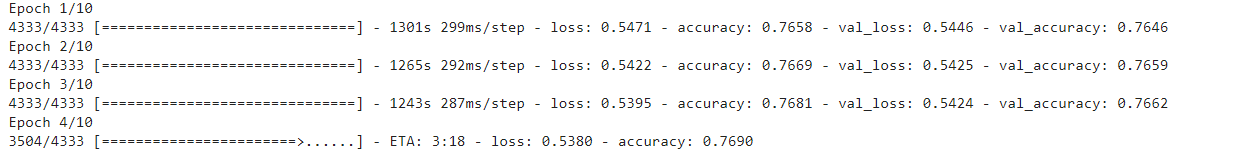

In [18]:
num_epochs = 10
history = model.fit(X_train, y_train, epochs=num_epochs)

Epoch 1/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9451 - loss: 0.1677
Epoch 2/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9517 - loss: 0.1591
Epoch 3/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.9578 - loss: 0.1411
Epoch 4/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9598 - loss: 0.1220
Epoch 5/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.9634 - loss: 0.1192
Epoch 6/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.9682 - loss: 0.1085
Epoch 7/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.9629 - loss: 0.1232
Epoch 8/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - accuracy: 0.9660 - loss: 0.1054
Epoch 9/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.9691 - loss: 0.0957
Epoch 10/10
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.9794 - loss: 0.0773


# Performance Metrics and Accuracy

Perform binary prediction on test data set

In [14]:
y_pred = history.model.predict(X_test)
y_pred

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


array([[0.07882895],
       [0.7984089 ],
       [0.9773717 ],
       ...,
       [0.9988091 ],
       [0.92489713],
       [0.9960372 ]], dtype=float32)

In [15]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


**Confusion Matrix**

In [16]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[ 329   72]
 [  82 1017]]


**Accuracy Score**

In [17]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8973333333333333
